In [2]:
import numpy as np        #넘파이 라이브러리 불러오기
import pandas as pd        #판다스 라이브러리 불러오기
import matplotlib as mpl  # 맷플로립 불러오기
import matplotlib.pyplot as plt  # 그래프 그리기 기능 불러오기
import matplotlib.font_manager as fm  # 폰트 매니저 실행
import seaborn as sns     # 씨본 불러오기


fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', name='NanumMyeongjo') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumMyeongjo'}) #폰트설정

# 기후데이터
- 습도, 일사량, 일조시간 결측값 처리 방법 논의 필요
- 군위 2017, 2018 일사량 결측값

In [15]:
# df = 기후데이터
file_path = "C:\\Users\\user\\Desktop\\파이썬 프로젝트_사과재배적지 분석\\기후_피봇테이블.xlsx"
df = pd.read_excel(file_path, engine = 'openpyxl')

# 일사량 column명 변경
df = df.rename(columns={'일사량(평균)' : '일사량'})

# 습도 결측치 처리
# 결측값 5개 모두 군위지역으로, 2017~2023 군위 평균습도로 결측치 대체
df['습도'] = df['습도'].fillna(70.6)

df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      841 non-null    object 
 1   연도      841 non-null    int64  
 2   월       841 non-null    int64  
 3   순별      841 non-null    object 
 4   날짜      841 non-null    object 
 5   평균기온    841 non-null    float64
 6   최고기온    841 non-null    float64
 7   최저기온    841 non-null    float64
 8   일교차     841 non-null    float64
 9   습도      841 non-null    float64
 10  풍속      841 non-null    float64
 11  강수량     841 non-null    float64
 12  일사량     436 non-null    float64
 13  일조시간    502 non-null    float64
dtypes: float64(9), int64(2), object(3)
memory usage: 92.1+ KB


지역        0
연도        0
월         0
순별        0
날짜        0
평균기온      0
최고기온      0
최저기온      0
일교차       0
습도        0
풍속        0
강수량       0
일사량     405
일조시간    339
dtype: int64

In [4]:
# 기후데이터 피봇테이블
df = pd.pivot_table(df, index = ['지역', '연도', '월', '순별'],
                    values = ['평균기온', '최고기온', '최저기온', '일교차', '습도', '강수량', '일사량', '일조시간'],
                    aggfunc = {'평균기온' : 'mean',
                               '최고기온' : 'mean',
                               '최저기온' : 'mean',
                               '일교차' : 'mean',
                               '습도' : 'mean',
                               '강수량' : 'mean',
                               '일사량' : 'sum',
                               '일조시간' : 'sum'})
#                     fill_value=0) # fill_value = 결측값(습도, 일사량, 일조시간)은 0으로 처리

# 피봇테이블 to 데이터프레임
df = pd.DataFrame(df.to_records())

# 야간 평균기온 데이터
- 군위, 포천 2지역 모두 2023년 데이터 無
- 결측값 처리 방법 논의 필요

In [5]:
night_temp = pd.read_excel("C:\\Users\\user\\Desktop\\파이썬 프로젝트_사과재배적지 분석\\포천_군위_야간평균기온.xlsx", engine = 'openpyxl')
# 기온(°C), 지점 column명 변경
night_temp = night_temp.rename(columns={'기온(°C)' : '기온'})
night_temp = night_temp.rename(columns={'지점' : '지역'})
night_temp.info()

#결측값 확인
print(night_temp.isna().sum()/len(night_temp))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104551 entries, 0 to 104550
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역      104551 non-null  object 
 1   일시      104551 non-null  object 
 2   날짜      104551 non-null  object 
 3   시간      104551 non-null  int64  
 4   기온      104345 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ MB
지역    0.00000
일시    0.00000
날짜    0.00000
시간    0.00000
기온    0.00197
dtype: float64


In [6]:
### 야간시간(22시~6시) 추출
# 0~6시
night_temp1 = night_temp.loc[night_temp['시간'] < 7]

# 22~23시
night_temp2 = night_temp.loc[night_temp['시간'] > 21]

# 22시~6시
night_temp = pd.concat([night_temp1, night_temp2], axis = 0)

# '날짜' Column -> '-' 기준, 연/월/일 3개의 컬럼으로 나눠서 추가
night_temp[['연도', '월', '일']] = night_temp['날짜'].str.split('-', expand = True)

# '연도', '월', '일' column Dtype 변경 (object -> int)
night_temp = night_temp.astype({'연도':'int'})
night_temp = night_temp.astype({'월':'int'})
night_temp = night_temp.astype({'일':'int'})

night_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39206 entries, 0 to 104550
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      39206 non-null  object 
 1   일시      39206 non-null  object 
 2   날짜      39206 non-null  object 
 3   시간      39206 non-null  int64  
 4   기온      39144 non-null  float64
 5   연도      39206 non-null  int32  
 6   월       39206 non-null  int32  
 7   일       39206 non-null  int32  
dtypes: float64(1), int32(3), int64(1), object(3)
memory usage: 2.2+ MB


In [7]:
#'순별' Column 추가
def season(x):
    if 0 < x <= 10: # '일' = 1~10일 = 상순
        x = '상순'
    elif 10 < x <= 20: # '일' = 11~20일 = 중순
        x = '중순'
    elif 20 < x: # '일' = 21~31일 = 하순
        x = '하순'
    return x
    
night_temp['순별'] = night_temp['일'] # '일' column값을 가진 '순별' column 추가
night_temp['순별'] = night_temp['순별'].apply(season) # season(x) 함수에 따라 '순별' column값 변경
night_temp

,지역,일시,날짜,시간,기온,연도,월,일,순별
0,포천,2017-01-01 00:00:00,2017-01-01,0,-2.7,2017,1,1,상순
1,포천,2017-01-01 01:00:00,2017-01-01,1,-3.6,2017,1,1,상순
2,포천,2017-01-01 02:00:00,2017-01-01,2,-3.2,2017,1,1,상순
3,포천,2017-01-01 03:00:00,2017-01-01,3,-3.0,2017,1,1,상순
4,포천,2017-01-01 04:00:00,2017-01-01,4,-3.5,2017,1,1,상순
...,...,...,...,...,...,...,...,...,...
104502,군위,2022-12-29 23:00:00,2022-12-29,23,-6.4,2022,12,29,하순
104525,군위,2022-12-30 22:00:00,2022-12-30,22,-2.6,2022,12,30,하순
104526,군위,2022-12-30 23:00:00,2022-12-30,23,-3.9,2022,12,30,하순
104549,군위,2022-12-31 22:00:00,2022-12-31,22,-5.4,2022,12,31,하순


In [8]:
# 월별 야간 평균 기온 피봇팅
night_temp3 = pd.pivot_table(night_temp,
                            index = ['지역', '연도', '월', '순별'],
                            values = ['기온'],
                            aggfunc = 'mean').round(1)

# 피봇테이블 to 데이터프레임
night_temp3 = pd.DataFrame(night_temp3.to_records())
night_temp3.loc[night_temp3['연도']==2022]

,지역,연도,월,순별,기온
180,군위,2022,1,상순,-6.6
181,군위,2022,1,중순,-6.1
182,군위,2022,1,하순,-3.1
183,군위,2022,2,상순,-5.3
184,군위,2022,2,중순,-4.2
...,...,...,...,...,...
427,포천,2022,11,중순,5.6
428,포천,2022,11,하순,3.5
429,포천,2022,12,상순,-4.7
430,포천,2022,12,중순,-9.0


# 기후 데이터 + 야간 평균 기온 데이터 취합

In [10]:
climate = pd.merge(df, night_temp3, on=['지역', '연도', '월', '순별'], how='outer')
climate= climate.rename(columns = {'기온':'야간평균기온'})
climate

,지역,연도,월,순별,강수량,습도,일교차,일사량,일조시간,최고기온,최저기온,평균기온,야간평균기온
0,군위,2017,1,상순,0.00,80.50,12.50,0.0,6.116667,5.10,-7.40,1.50,-1.4
1,군위,2017,1,중순,0.50,63.60,14.20,0.0,2.766667,-1.10,-15.30,-4.10,-6.9
2,군위,2017,1,하순,4.50,65.60,19.70,0.0,10.450000,1.80,-17.90,-4.20,-7.1
3,군위,2017,2,상순,0.50,59.20,16.10,0.0,10.983333,4.00,-12.10,-0.90,-4.1
4,군위,2017,2,중순,14.00,63.40,18.10,0.0,3.000000,6.80,-11.30,0.40,-3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,포천,2023,11,중순,9.75,71.35,11.70,92.8,10.883333,4.60,-7.10,1.05,NaN
500,포천,2023,11,하순,5.50,64.55,20.20,79.1,2.066667,9.90,-10.30,0.95,NaN
501,포천,2023,12,상순,4.00,72.25,24.60,68.1,1.183333,12.90,-11.70,3.35,NaN
502,포천,2023,12,중순,47.50,78.65,21.75,52.5,5.833333,5.70,-16.05,-2.25,NaN


# 사과 품질 데이터

In [11]:
# 사과 품질 데이터 불러오기
apple = pd.read_excel("C:\\Users\\user\\Desktop\\파이썬 프로젝트_사과재배적지 분석\\과실품질정보_군위_포천.xlsx")

# 산도(%) 이름 변경
apple = apple.rename(columns={'산도(%)' : '산도'})

# '지역' = 군위, 포천
apple1 = apple.loc[apple['지역']=='군위']
apple2 = apple.loc[apple['지역']=='포천']
apple = pd.concat([apple1, apple2], axis=0)
apple

,지역,연도,수확일자,경도평균,당도,산도
0,군위,2023,2023-09-04,62.4,14.8,0.22
10,군위,2022,2022-08-30,54.7,13.9,0.27
20,군위,2021,2021-08-26,56.0,13.4,0.22
30,군위,2020,2020-09-02,58.0,14.5,0.23
39,군위,2019,2019-09-06,60.1,14.0,0.23
48,군위,2018,2018-09-05,37.7,15.6,0.23
57,군위,2017,2017-09-06,38.0,15.2,0.19
6,포천,2023,2023-09-20,65.3,14.5,0.19
16,포천,2022,2022-09-07,39.8,14.1,0.21
26,포천,2021,2021-09-09,37.7,14.0,0.21


# 기후데이터 + 사과데이터

### - 1년치 기후데이터 + 사과데이터

In [12]:
# 1년치 기후데이터 + 사과데이터
climate_apple = pd.merge(climate, apple, on=['지역', '연도'], how = 'outer')
climate_apple = climate_apple.round(2)
climate_apple

,지역,연도,월,순별,강수량,습도,일교차,일사량,일조시간,최고기온,최저기온,평균기온,야간평균기온,수확일자,경도평균,당도,산도
0,군위,2017,1,상순,0.00,80.50,12.50,0.0,6.12,5.10,-7.40,1.50,-1.4,2017-09-06,38.0,15.2,0.19
1,군위,2017,1,중순,0.50,63.60,14.20,0.0,2.77,-1.10,-15.30,-4.10,-6.9,2017-09-06,38.0,15.2,0.19
2,군위,2017,1,하순,4.50,65.60,19.70,0.0,10.45,1.80,-17.90,-4.20,-7.1,2017-09-06,38.0,15.2,0.19
3,군위,2017,2,상순,0.50,59.20,16.10,0.0,10.98,4.00,-12.10,-0.90,-4.1,2017-09-06,38.0,15.2,0.19
4,군위,2017,2,중순,14.00,63.40,18.10,0.0,3.00,6.80,-11.30,0.40,-3.2,2017-09-06,38.0,15.2,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,포천,2023,11,중순,9.75,71.35,11.70,92.8,10.88,4.60,-7.10,1.05,NaN,2023-09-20,65.3,14.5,0.19
500,포천,2023,11,하순,5.50,64.55,20.20,79.1,2.07,9.90,-10.30,0.95,NaN,2023-09-20,65.3,14.5,0.19
501,포천,2023,12,상순,4.00,72.25,24.60,68.1,1.18,12.90,-11.70,3.35,NaN,2023-09-20,65.3,14.5,0.19
502,포천,2023,12,중순,47.50,78.65,21.75,52.5,5.83,5.70,-16.05,-2.25,NaN,2023-09-20,65.3,14.5,0.19


### - 7~9월 기후데이터 + 사과데이터

In [13]:
### 7~9월 기후데이터 + 사과데이터
# index = '월' column
z = climate_apple.set_index('월')

# index = 7~9(월)
z = z.loc[[7, 8, 9]]

# '월' : index -> column으로 복원
z = z.reset_index(drop=False)

# column 순서 정리
z = z[['지역', '연도', '월', '순별', '강수량', '습도', '일교차', '일사량', '일조시간', '최고기온', '최저기온', '평균기온', '야간평균기온', '수확일자', '경도평균', '당도', '산도']]
z = z.round(2)
z

,지역,연도,월,순별,강수량,습도,일교차,일사량,일조시간,최고기온,최저기온,평균기온,야간평균기온,수확일자,경도평균,당도,산도
0,군위,2017,7,상순,28.00,81.40,7.80,0.0,9.53,28.40,20.60,26.50,24.4,2017-09-06,38.0,15.2,0.19
1,군위,2017,7,중순,23.50,79.60,9.00,0.0,6.23,28.70,19.70,26.40,23.6,2017-09-06,38.0,15.2,0.19
2,군위,2017,7,하순,78.00,83.90,13.50,0.0,4.33,28.80,15.30,25.50,23.1,2017-09-06,38.0,15.2,0.19
3,군위,2018,7,상순,218.00,89.30,11.40,0.0,0.80,25.80,14.40,22.00,20.5,2018-09-05,37.7,15.6,0.23
4,군위,2018,7,중순,0.00,80.90,7.00,0.0,11.63,28.40,21.40,27.90,24.6,2018-09-05,37.7,15.6,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,포천,2022,9,중순,43.00,80.35,13.30,124.9,12.52,24.60,11.30,22.00,20.6,2022-09-07,39.8,14.1,0.21
122,포천,2022,9,하순,4.00,80.60,9.75,173.8,10.53,16.80,7.05,15.65,11.9,2022-09-07,39.8,14.1,0.21
123,포천,2023,9,상순,2.00,82.95,10.95,189.3,5.98,26.25,15.30,23.55,NaN,2023-09-20,65.3,14.5,0.19
124,포천,2023,9,중순,70.00,89.80,6.15,107.1,3.42,23.65,17.50,22.20,NaN,2023-09-20,65.3,14.5,0.19


# 전처리 데이터 csv 다운로드↓↓↓

In [14]:
# 파일 위치 지정
filepath = "C:\\Users\\user\\Desktop\\파이썬 프로젝트_사과재배적지 분석"

# 1년치 기후 데이터 + 사과 데이터 취합본
climate_apple.to_csv(filepath+'1년기후_사과', sep=',', index=False)

# 7~9월 기후 데이터 + 사과 데이터 취합본
z.to_csv(filepath+'7~9월기후_사과', sep=',', index=False)

# 시각화

In [ ]:
climate_apple = pd.pivot_table(climate_apple, index = ['연도'],
                                values = ['평균기온', '최고기온', '최저기온', '야간평균기온', '일교차', '습도', '강수량', '일사량', '일조시간', '경도평균', '당도', '산도'],
                                aggfunc = 'mean')
climate_apple = pd.pivot_table(climate_apple, index = ['연도', '월'],
                                values = ['평균기온', '최고기온', '최저기온', '야간평균기온', '일교차', '습도', '강수량', '일사량', '일조시간', '경도평균', '당도', '산도'],
                                aggfunc = 'mean')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


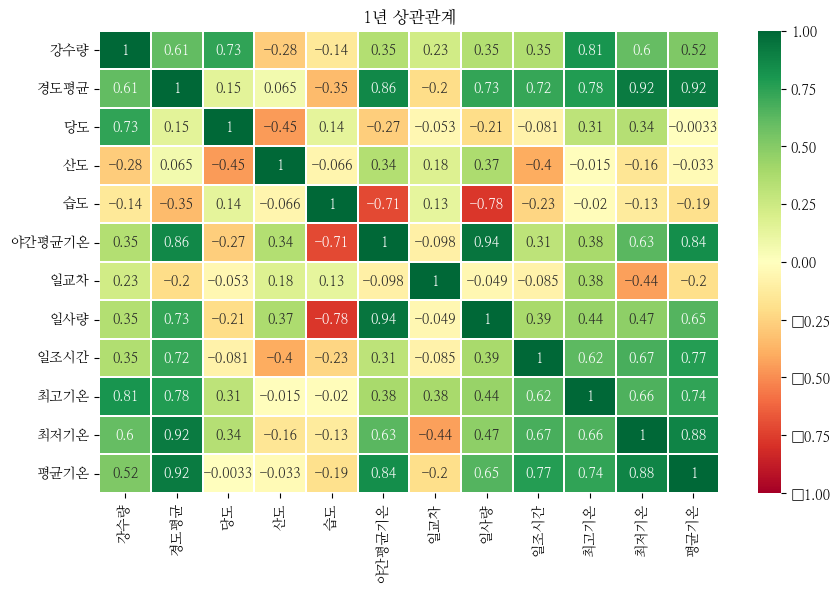

In [16]:
### 선형 회귀 관계를 보여주는 'lmplot'
# 연도별 상관관계
climate_apple = pd.pivot_table(climate_apple, index = ['연도'],
                                values = ['평균기온', '최고기온', '최저기온', '야간평균기온', '일교차', '습도', '강수량', '일사량', '일조시간', '경도평균', '당도', '산도'],
                                aggfunc = 'mean')
data1 = pd.DataFrame(climate_apple.to_records())
data1 = data1.drop(columns=['연도'])
plt.figure(figsize=(10,6))
plt.title('1년 상관관계')
sns.heatmap(data1.corr(), linewidths=0.2, vmax=1, vmin = -1, center = 0, cmap='RdYlGn', linecolor='white', annot=True)
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


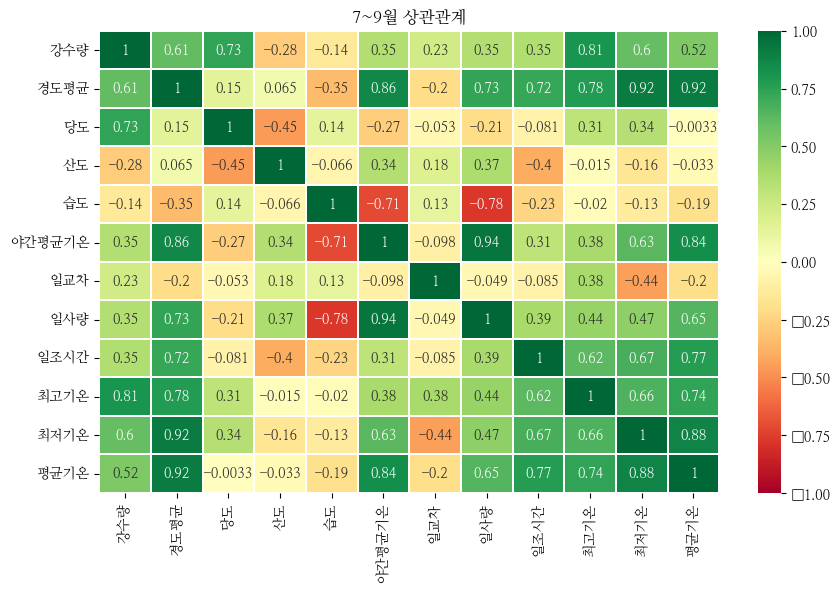

In [19]:
# 위의 1년 상관관계랑 결과값 동일
z = pd.pivot_table(z, index = ['연도','월'],
                                values = ['평균기온', '최고기온', '최저기온', '야간평균기온', '일교차', '습도', '강수량', '일사량', '일조시간', '경도평균', '당도', '산도'],
                                aggfunc = 'mean')
data2 = pd.DataFrame(climate_apple.to_records())
data2
data2 = data2.drop(columns=['연도'])
plt.figure(figsize=(10,6))
plt.title('7~9월 상관관계')
sns.heatmap(data2.corr(), linewidths=0.2, vmax=1, vmin = -1, center = 0, cmap='RdYlGn', linecolor='white', annot=True)
plt.show()

In [ ]:
sns.relplot(x='연도', y='평균기온', hue='경도평균', data=climate_apple)
sns.relplot(x='연도', y='평균기온', hue='산도', data=climate_apple)
sns.relplot(x='연도', y='평균기온', hue='당도', data=climate_apple)

# 상관관계 분석(?)

In [ ]:
# combine = 기후데이터 + 사과품질데이터 취합파일 (.xslx)
combine = pd.read_excel("C:\\Users\\user\\Desktop\\파이썬 프로젝트_사과재배적지 분석\\기후_피봇테이블.xlsx")

# 상관관계 분석을 위해 str? object? 인 지역을 index로 설정
# loc_df = df.copy()
# loc_df.index = loc_df['Korean Name']
combine_df = combine.copy()
combine_df.index = combine_df['지역']
gunwi = combine_df.loc['군위']
pocheon = combine_df.loc['포천']

In [ ]:
# 수확일자는 상관관계와 관련 없다고 판단하여 열 제거 처리
gunwi = gunwi.drop(columns=['지역', '연도']).corr()
pocheon = pocheon.drop(columns=['지역', '연도']).corr()
combine = combine.drop(columns=['지역', '연도']).corr()

In [ ]:
# 군위, 포천 지역 상관관계
plt.figure(figsize=(8, 6))
sns.heatmap(combine.corr(), linewidths=0.2, vmax=1, vmin = -1, center = 0, cmap='RdYlGn', linecolor='white', annot=True)
plt.show()

In [ ]:
# 군위 지역 상관관계
plt.figure(figsize=(8, 6))
sns.heatmap(gunwi.corr(), linewidths=0.2, vmax=1, vmin = -1, center = 0, cmap='RdYlGn', linecolor='white', annot=True)
plt.show()

In [ ]:
# 포천 지역 상관관계
plt.figure(figsize=(8, 6))
sns.heatmap(pocheon.corr(), linewidths=0.2, vmax=1, vmin = -1, center = 0, cmap='RdYlGn', linecolor='white', annot=True)
plt.show()

In [ ]:
gunwi_period